# Forecasting Introduction

Before we start diving in and making forecasting models we need flesh out some details.

In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Time series to tabular format

This is going to be general at first then I will make a specific example.

We start with a time-series of data. With associated observations

In [2]:
def generateObsTable(L):
    # Create the initial DataFrame
    t_values = list(range(1, L))  # Extended range for demonstration
    obs_values = ["Obs" + str(i) for i in t_values]
    df = pd.DataFrame({
        't': t_values,
        'Obs': obs_values
    })
    return df

df_ts = generateObsTable(15)
df_ts

,t,Obs
0,1,Obs1
1,2,Obs2
2,3,Obs3
3,4,Obs4
4,5,Obs5
5,6,Obs6
6,7,Obs7
7,8,Obs8
8,9,Obs9
9,10,Obs10


Our supervised learning algorithms want some kind of *tabular* data. We can convert our time series by taking (for example), as each observation:
* Independent variables as Obs1 and Obs2 and our dependent variables as Obs3. 
* Independent variables as Obs2 and Obs3 and our dependent variables as Obs4. 
* and so on until we run out of data.

In [3]:
def transformTable(df, N):
    # Check if N is valid
    if N >= len(df) - 1:
        raise ValueError("N is too large for the provided DataFrame.")
    
    # Create new DataFrame with shifted values
    data = {}
    for i in range(N):
        data[f'x{i+1}'] = df['Obs'][i:-N+i].values
    data['y'] = df['Obs'][N:].values
    
    df_new = pd.DataFrame(data)
    return df_new

In [10]:
df_tab = transformTable(df_ts,2)
df_tab

,x1,x2,y
0,Obs1,Obs2,Obs3
1,Obs2,Obs3,Obs4
2,Obs3,Obs4,Obs5
3,Obs4,Obs5,Obs6
4,Obs5,Obs6,Obs7
5,Obs6,Obs7,Obs8
6,Obs7,Obs8,Obs9
7,Obs8,Obs9,Obs10
8,Obs9,Obs10,Obs11
9,Obs10,Obs11,Obs12


How do we make forecasts from this?
* Take our last two observations Obs13 and Obs14, and use the regressor we learned to make Pred15.

In [8]:
def addPredictedRow(df):
    # Extract the last row
    last_row = df.iloc[-1]
    
    # Create new row data
    new_data = {}
    for i in range(len(last_row) - 1):
        new_data[f'x{i+1}'] = last_row[f'x{i+2}'] if i+2 <= len(last_row) - 1 else last_row['y']
    
    # Extract the number from the last 'y' value and increment it
    last_num = int(last_row['y'].replace('Obs', '').replace('Pred', ''))
    new_data['y'] = f'Pred{last_num + 1}'
    
    new_row_df = pd.DataFrame([new_data])
    df = pd.concat([df, new_row_df], ignore_index=True)
    return df

In [11]:
df_tab = add_predicted_row(df_tab)
df_tab

,x1,x2,y
0,Obs1,Obs2,Obs3
1,Obs2,Obs3,Obs4
2,Obs3,Obs4,Obs5
3,Obs4,Obs5,Obs6
4,Obs5,Obs6,Obs7
5,Obs6,Obs7,Obs8
6,Obs7,Obs8,Obs9
7,Obs8,Obs9,Obs10
8,Obs9,Obs10,Obs11
9,Obs10,Obs11,Obs12


Lets apply this one more time

In [12]:
df_tab = add_predicted_row(df_tab)
df_tab

,x1,x2,y
0,Obs1,Obs2,Obs3
1,Obs2,Obs3,Obs4
2,Obs3,Obs4,Obs5
3,Obs4,Obs5,Obs6
4,Obs5,Obs6,Obs7
5,Obs6,Obs7,Obs8
6,Obs7,Obs8,Obs9
7,Obs8,Obs9,Obs10
8,Obs9,Obs10,Obs11
9,Obs10,Obs11,Obs12


## Demo with numbers.

Lets make a demonstration with some number to see how this works.

In [25]:


# Define the start date and number of hours
start_date = "2023-10-10"
num_hours = 24  # for one day.

# Generate the hourly datetime range
date_range = pd.date_range(start=start_date, periods=num_hours, freq='H')

# Create the DataFrame
df_timeseries = pd.DataFrame({
    'DateTime': date_range
})


def apply_function(index):
    gaussian_noise = np.random.normal(0, 1)  # mean=0, std_dev=1
    return 0.5 * index + gaussian_noise

df_timeseries['Obs'] = df_timeseries.index.map(apply_function)
df_timeseries

,DateTime,Obs
0,2023-10-10 00:00:00,-1.562583
1,2023-10-10 01:00:00,-0.886739
2,2023-10-10 02:00:00,0.202450
3,2023-10-10 03:00:00,2.942305
4,2023-10-10 04:00:00,4.283796
5,2023-10-10 05:00:00,3.994006
6,2023-10-10 06:00:00,1.935525
7,2023-10-10 07:00:00,5.513822
8,2023-10-10 08:00:00,5.410689
9,2023-10-10 09:00:00,4.999322


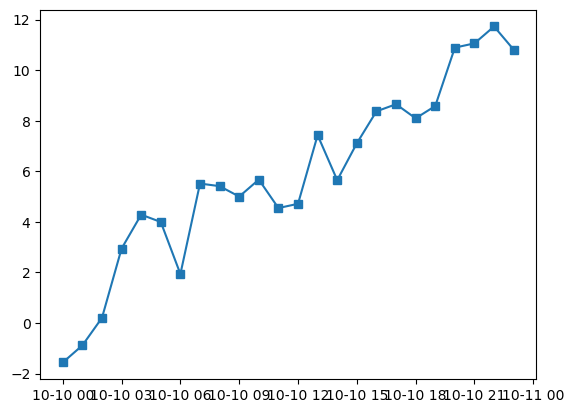

In [26]:
plt.plot(df_timeseries['DateTime'],df_timeseries['Obs'],'s-')

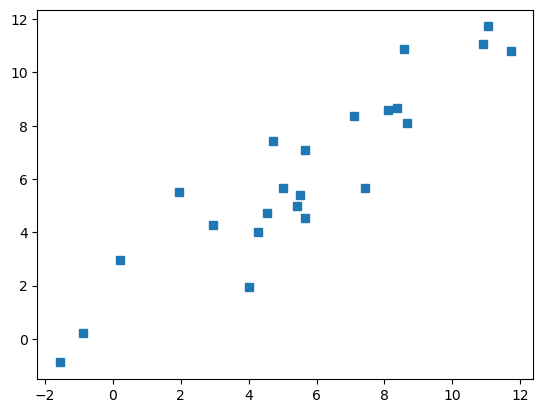

In [34]:
df_tab = transformTable(df_timeseries,1)
df_tab
plt.plot(df_tab['x1'],df_tab['y'],'s')

In [48]:
# Define the start date and number of hours
start_date = "2023-10-10"
num_hours = 24  # for one day.

# Generate the hourly datetime range
date_range = pd.date_range(start=start_date, periods=num_hours, freq='H')

# Create the DataFrame
df_timeseries = pd.DataFrame({
    'DateTime': date_range
})


def apply_function(index):
    gaussian_noise = np.random.normal(0, 1)  # mean=0, std_dev=1
    return 0.5 * (index -14)**2 +  gaussian_noise

df_timeseries['Obs'] = df_timeseries.index.map(apply_function)
df_timeseries

,DateTime,Obs
0,2023-10-10 00:00:00,96.982104
1,2023-10-10 01:00:00,85.835936
2,2023-10-10 02:00:00,72.042069
3,2023-10-10 03:00:00,58.937695
4,2023-10-10 04:00:00,48.838572
5,2023-10-10 05:00:00,39.955086
6,2023-10-10 06:00:00,31.440698
7,2023-10-10 07:00:00,22.888872
8,2023-10-10 08:00:00,17.242653
9,2023-10-10 09:00:00,13.268764


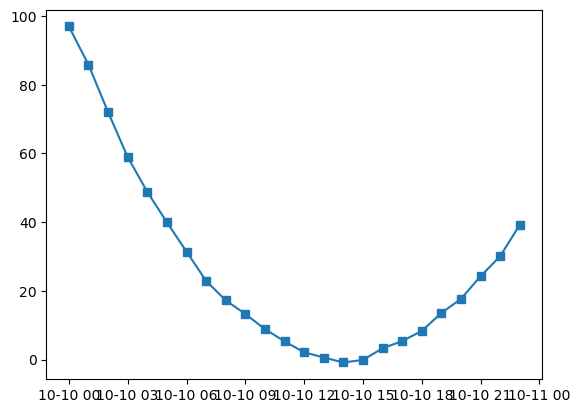

In [49]:
plt.plot(df_timeseries['DateTime'],df_timeseries['Obs'],'s-')

In [50]:
df_tab = transformTable(df_timeseries,2)


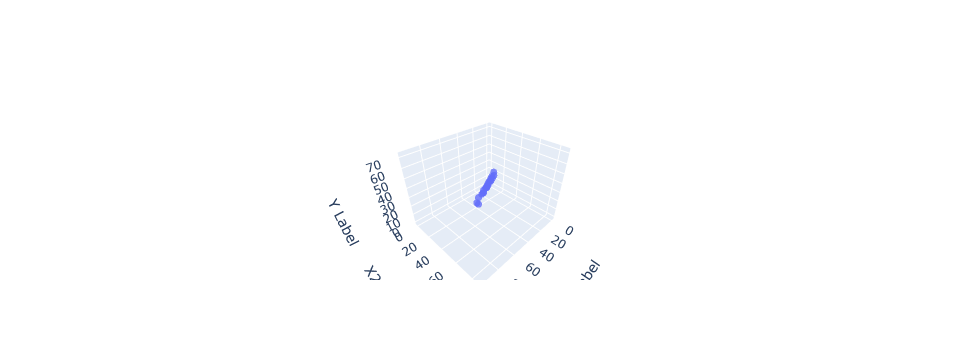

In [51]:
import plotly.graph_objects as go

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=df_tab['x1'],
    y=df_tab['x2'],
    z=df_tab['y'],
    mode='markers',
    marker=dict(size=4, opacity=0.8)
)])

# Set axis labels
fig.update_layout(scene=dict(
    xaxis_title='X1 Label',
    yaxis_title='X2 Label',
    zaxis_title='Y Label'
))

# Show plot
fig.show()
